In [49]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
pd.set_option('display.max_columns', 500)

# ML

In [50]:
lm = LinearRegression()
logis = LogisticRegression()
lasso = Lasso(normalize=True)
ridge = Ridge()
enet = ElasticNet()

In [51]:
features = pd.read_csv('./data/features_dummified_214col.csv') # 2580 x 221
target = pd.read_csv('./data/Ames_Housing_Price_Data.csv')['SalePrice']

features2 = pd.read_csv('./data/features_dummified_376col.csv') # 2558 x 377
target2 = pd.read_csv('./data/target_376col.csv')['SalePrice']

In [52]:
pd.DataFrame({'model': ['lasso', 'ridge', 'elastic net'],
              'R2_train': [0.903, 0.903, 0.873], 
              'R2_test': [0.925, 0.925, 0.893], 
              'CV': [10, 10, 10],
              'features': [52, 74, 74],
              'hyperparameters': ['alpha: 11.29, normalize=True', 
                                  'alpha: 16.84, normalize=False',
                                  'alpha: 1.00, normalize=False']
            
            
             })

# seed 84 ==> R2 (0.904 / 0.934)

,model,R2_train,R2_test,CV,features,hyperparameters
0,lasso,0.903,0.925,10,52,"alpha: 11.29, normalize=True"
1,ridge,0.903,0.925,10,74,"alpha: 16.84, normalize=False"
2,elastic net,0.873,0.893,10,74,"alpha: 1.00, normalize=False"


## Models

In [53]:
# lets start by adding a random state and splitting the dataset

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.3, random_state=44)

In [54]:
from sklearn.ensemble import GradientBoostingRegressor #, GradientBoostingClassifier, 
from sklearn.metrics import mean_squared_error

gbm = GradientBoostingRegressor()


In [68]:
def tune_gbm(learning_rate, max_depth):
    gbm = GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=10000, max_depth=max_depth)
    gbm.fit(X_train,Y_train)
    
    return gbm


def demo_gbm_tuning(model, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(X_train)
    gen_test  = model.staged_predict(X_test)

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, Y_train))
        testMSE.append(mean_squared_error(y_pred_test, Y_test))
    
    print(f'The best test score is {min(testMSE)} at the step {np.argmin(testMSE)+1}')
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end], color='red', label='test MSE')
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end], label='train MSE')
    
    plt.legend()
    plt.show()

In [67]:
print(model1.score(X_train, Y_train))
print(model1.score(X_test, Y_test))

0.9993773000857638
0.9380746821189312


In [70]:
def grid_fit(model, params, cv):
    
    grid = GridSearchCV(model, params, cv=cv, return_train_score = True)
    ans = grid.fit(X_train, Y_train)
    model = ans.best_estimator_
    return model.fit(X_train, Y_train)

In [96]:
print(f'features, features2, train score, test score:')
for lr in [1e-4, 1e-3, 1e-2, 1e-1]:
    for md in range(3, 10):
        for mf in ['auto', 'sqrt', 'log2']:
            
            gbm = GradientBoostingRegressor(n_estimators=10000, learning_rate=lr,
                                           max_depth=md, max_features=mf)
            gbm.fit(X_train, Y_train)
            
            features = 0
            features2 = 0

            for idx, feature in enumerate(sorted_importance):
                if feature[1] == 0:
                    continue
                elif feature[1] < 1e-4:
                    features2 += 1
                    features += 1
                else:
                    features += 1
                    

            print(f'lr:{lr}, md:{md}, mf:{mf}, feat:{features}, feat2: {features2}, train:{gbm.score(X_train, Y_train)}, test: {gbm.score(X_test, Y_test)}')

features, features2, train score, test score:
lr:0.0001, md:3, mf:auto, feat:176, feat2: 104, train:0.7048780747179931, test: 0.6925786729343638
lr:0.0001, md:3, mf:sqrt, feat:176, feat2: 104, train:0.6164430790457138, test: 0.612020259292323
lr:0.0001, md:3, mf:log2, feat:176, feat2: 104, train:0.5339858229107342, test: 0.5346950710608598
lr:0.0001, md:4, mf:auto, feat:176, feat2: 104, train:0.7541762336155279, test: 0.7268204816098722
lr:0.0001, md:4, mf:sqrt, feat:176, feat2: 104, train:0.676457109234719, test: 0.6602402249289965
lr:0.0001, md:4, mf:log2, feat:176, feat2: 104, train:0.6040180586360704, test: 0.5941703179011821
lr:0.0001, md:5, mf:auto, feat:176, feat2: 104, train:0.7893376962538098, test: 0.7382938247482478
lr:0.0001, md:5, mf:sqrt, feat:176, feat2: 104, train:0.7217064619637731, test: 0.690406053820052
lr:0.0001, md:5, mf:log2, feat:176, feat2: 104, train:0.6576581594909179, test: 0.6348321134440994
lr:0.0001, md:6, mf:auto, feat:176, feat2: 104, train:0.8155486615

The best test score is 349486042.07519454 at the step 7160
--------------------------------------------------


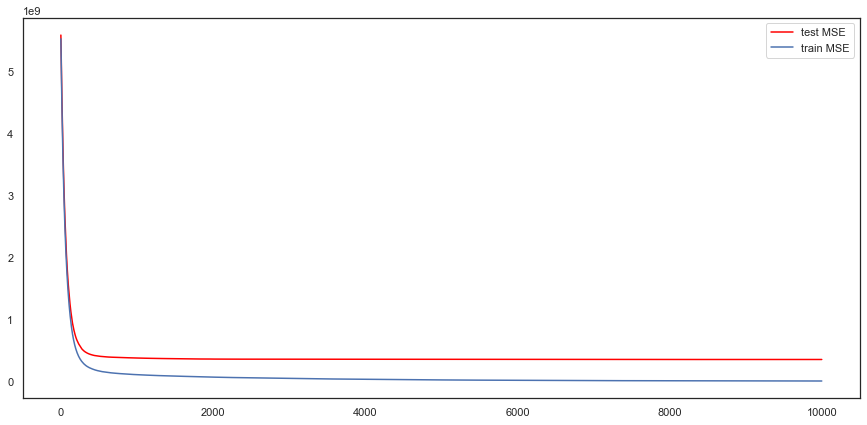

In [69]:
demo_gbm_tuning(model1, start, end)

In [61]:
features = 0

for idx, feat in enumerate(sorted_importance):
    print(idx, feat[0], feat[1])

0 OverallQual 0.5203415948868357
1 GrLivArea 0.14130470180905647
2 TotalBsmtSF 0.08747872800555574
3 BsmtFinSF1 0.027869321495154323
4 GarageArea 0.02488139615312641
5 LotArea 0.02382033690807909
6 ExterQual 0.021516487745695957
7 KitchenQual 0.02086084652473233
8 YearBuilt 0.01779981725511429
9 BsmtQual 0.016740797774253264
10 HouseAge 0.009188586303169023
11 FireplaceQu 0.00862478129834048
12 2ndFlrSF 0.007750453007356098
13 OverallCond 0.007318883870248423
14 LastRemod 0.005706863485513519
15 ScreenPorch 0.005500462465166427
16 school_quality 0.004658578942892655
17 MasVnrArea 0.003937182771194414
18 YearRemodAdd 0.003341914638547737
19 BsmtFullBath 0.0030716963232309945
20 LotFrontage 0.0026576688891919195
21 OpenPorchSF 0.002534118611315673
22 GarageFinish 0.002442923964822525
23 BsmtExposure 0.0024193659899717805
24 CentralAir_N 0.001985925081744639
25 BedroomAbvGr 0.0016345595415041513
26 Neighborhood_Crawfor 0.0016098181965378616
27 MSZoning_RM 0.0015720885077463635
28 Neighbor

In [ ]:
# sorted_importance = sorted(zip(features.columns, model1.feature_importances_), key=lambda t:t[1], reverse=True)
# sorted_importance

Text(0.5, 1.0, 'Feature Importance Plot of 500-Tree GBM')

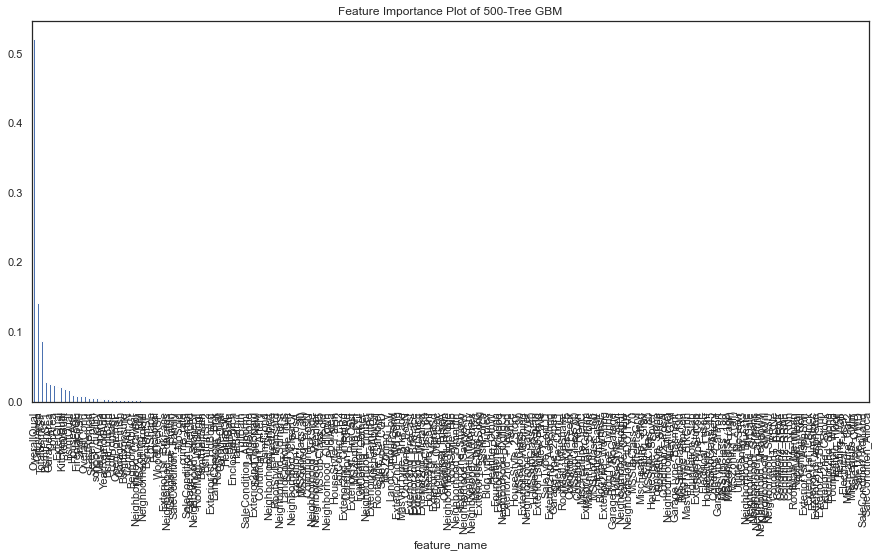

In [59]:
a, b = zip(*sorted_importance) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot of 500-Tree GBM')